# AdaBoost

Let us implement the AdaBoost algorithm, to build a powerful emsemble classifier from a set of weaker classifiers. Our base classifier will be a decision stump.

The training algorithm we will implement is as follows. We have $N$ training datapoints and are creating an ensemble of $k$ classifiers.

- Initialize the weights for all datapoints ($w_j = 1/N$ for $j=1,2,...N$)
- For $i = 1$ to $k$
    - Form training set $D_i$ by sampling $N$ tuples (with replacement) from the full training dataset. The sampling probability for a tuple $(x_j,y_j)$ should be given by its corresponding weight $w_j$.
    - Use dataset $D_i$ to fit a decision stump $M_i$. You can use sklearn's DecisionTreeClassifier with max_depth=1 to fit a decision stump.
    - Calculate the error rate for $M_i$ using the sum of the weights of the misclassified points.
    $$err(M_i) = \sum_{j=1}^N w_j * \mathbb{1}\{y_j \ne M_i(x_j)\}$$
    - The weight of classifier $M_i$'s vote is computed as $\alpha_i = 0.5*\log(\frac{1-err(M_i)}{err(M_i)})$
    - Increase the weight of the misclassified training points, and decrease the weight of the correctly classified training points.
    $$w_j \leftarrow w_j * \exp\{- \alpha_i * y_j * M_i(x_j)\}$$
    - Remember to normalize the weights so that they sum to 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import the libraries / functions that you use in your solution
from sklearn.tree import DecisionTreeClassifier

def train_AdaBoost(X, y, k):
    
    classifiers = []
    alphas = []
    
    ### BEGIN SOLUTION
    
    N = X.shape[0]
    D = np.concatenate((X, y.reshape(-1, 1)), axis=1)

    # Initialize weights
    #w = np.full(N,(1/N))
    #w = np.array([1/N for i in range(N)])
    w = np.ones((N,))/N
    np.random.seed(5)
    index = np.array([i for i in range(N)])

    for i in range(k):

        # Sample from the dataset according to weights
        
        ind_s = np.random.choice(index, size=N, replace=True, p=w)

        #u_ind = np.unique(ind_s)
        #ui = u_ind.shape[0]

        sX_train = np.empty((N, 2))
        sY_train = np.empty((N, 1))

        for i in range(N):

            sX_train[i] = X[ind_s[i]]
            sY_train[i] = D[ind_s[i]][2]

        # Fit a decision stump 
        dtc = DecisionTreeClassifier(max_depth=1)
        dtc = dtc.fit(sX_train, sY_train)

        Y_pred = dtc.predict(X)
        #print('Y_pred.shape ',Y_pred.shape)

        # Calculate the error rate
        error = 0.0
        for i in range(N):
            if Y_train[i] != Y_pred[i]:
                error += w[i]
        
        # Calculate the weight of classifier's vote
        alpha = 0.5 * np.log((1-error)/error)

        # Increase the weight of misclassified points
        for i in range(N):
            w[i] = w[i] * np.exp(-1.0 * alpha * Y_train[i] * Y_pred[i])

        w /= np.sum(w)
        
        # Append your classifier to the list classifiers
        classifiers.append(dtc)
        
        # Append your alpha to the list alphas
        alphas.append(alpha)
        
    ### END SOLUTION
    
    # classifiers and alphas need of be of type <class 'list'>
    return classifiers, np.array(alphas)

To obtain predictions, the vote of each classifier $M_i$ is weighted by its corresponding coefficient $\alpha_i$.

$$y_i = \text{sign}\{\sum_{i=1}^k \alpha_i*M_i(x_i)\}$$

In [ ]:
def predict_AdaBoost(X,classifiers, alphas):
    
    ### BEGIN SOLUTION

    #y = np.empty((X.shape[0],1))
    #y_pred = np.empty((X.shape[0],1))
    y = np.zeros(X.shape[0])

    for i in range(alphas.shape[0]):

        y += alphas[i] * classifiers[i].predict(X)

    y_pred = np.sign(y)

    ### END SOLUTION
    
    # y_pred needs to be of type <class 'numpy.ndarray'>
    return y_pred

The below function will help you plot the decision surface given by the algorithm.

In [ ]:
def plot_AdaBoost(X, y, classifiers, alphas):
    
    # Get limits of x and y for plotting the decision surface
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    # Get points at a distance of h between the above limits 
    h = .02    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    
    # Classify the all the points
    P = predict_AdaBoost(temp, classifiers, alphas).reshape(yy.shape)
    
    # Plot the decision boundary and margin
    plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()

Load the given datasets.

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

dtX = pd.read_csv('drive/My Drive/PRML/IITM/Question2/X_train.csv', header=None)
dtY = pd.read_csv('drive/My Drive/PRML/IITM/Question2/y_train.csv', header=None)
dt1X = pd.read_csv('drive/My Drive/PRML/IITM/Question2/X_test.csv', header=None)
dt1Y = pd.read_csv('drive/My Drive/PRML/IITM/Question2/y_test.csv', header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Plot the training data as a scatter plot.

No handles with labels found to put in legend.


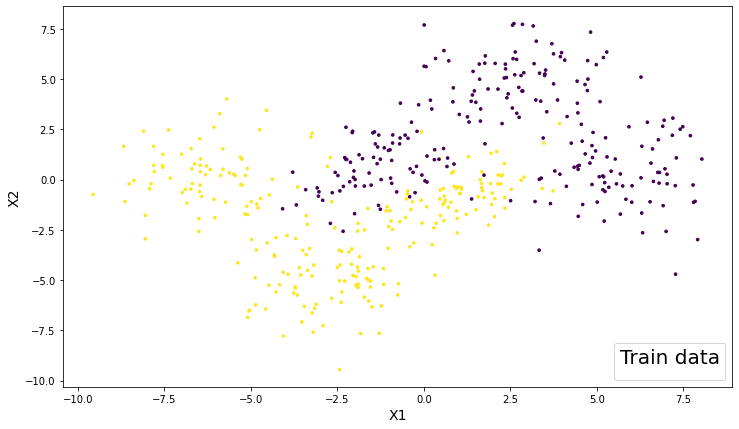

In [ ]:
#X_train
dataX = np.array(dtX)
mX, nX = dataX.shape

#print('dataX shape : ',dataX.shape)

dataX_train = dataX.T
X1_train = dataX_train[0]
X2_train = dataX_train[1]

#print('X1_train shape : ',X1_train.shape)
#print('X2_train shape : ',X2_train.shape)

#y_train
dataY = np.array(dtY)
mY, nY = dataY.shape

#print('dataY shape : ',dataY.shape)

dataY_train = dataY.T
Y_train = dataY_train[0]

#print('Y_train shape : ',Y_train.shape)

plt.figure(figsize=(12,7))

plt.scatter(X1_train,X2_train,s=7,c=Y_train)

plt.legend(title = 'Train data', fontsize=14, title_fontsize=20, loc=4)
plt.xlabel('X1',fontsize=14)
plt.ylabel('X2',fontsize=14)
plt.show()

Use the train_AdaBoost function to train an AdaBoost model with k=5.

In [ ]:
classifiers, alphas = train_AdaBoost(dataX,Y_train,5)

Use the predict_AdaBoost function to make predictions on X_test.

In [ ]:
#X_test
data1X = np.array(dt1X)
m1X, n1X = dataX.shape

#print('data1X shape : ',data1X.shape)

dataX_test = data1X.T
X1_test = dataX_test[0]
X2_test = dataX_test[1]

#print('X1_test shape : ',X1_test.shape)
#print('X2_test shape : ',X2_test.shape)

#y_test
data1Y = np.array(dt1Y)
m1Y, n1Y = data1Y.shape

#print('data1Y shape : ',data1Y.shape)

dataY_test = data1Y.T
Y_test = dataY_test[0]

#print('Y_test shape : ',Y_test.shape)

Y_pred = predict_AdaBoost(data1X,classifiers, alphas)

Use the plot_AdaBoost function to plot the learnt decision surface.

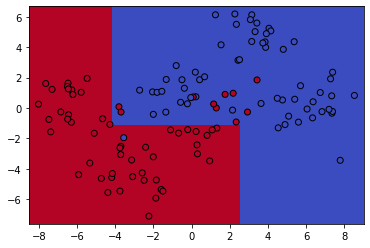

In [ ]:
plot_AdaBoost(data1X, Y_test, classifiers, alphas)

Compute the accuracy of the predictions on the test set.

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print('Accuracy for k = 5 is : ',accuracy(Y_test,Y_pred))

Accuracy for k = 5 is :  0.9083333333333333


Use the train_AdaBoost function to train an AdaBoost model with k=100.

In [ ]:
classifiers1, alphas1 = train_AdaBoost(dataX, Y_train, 100)

Use the predict_AdaBoost function to make predictions on X_test.

In [ ]:
Y_pred1 = predict_AdaBoost(data1X,classifiers1, alphas1)

Use the plot_AdaBoost function to plot the learnt decision surface.

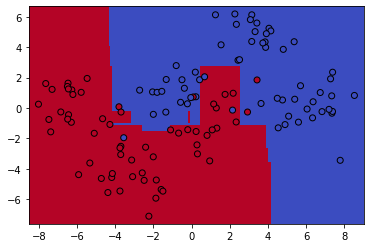

In [ ]:
plot_AdaBoost(data1X, Y_test, classifiers1, alphas1)

Compute the accuracy of the predictions on the test set.

In [ ]:
print('Accuracy for k = 100 is : ',accuracy(Y_test,Y_pred1))

Accuracy for k = 100 is :  0.9416666666666667
